In [18]:
# uncomment below and change file paths if using colab
# from google.colab import drive
# drive.mount('/drive')

In [19]:
# lists of words for reference and use 
# words = ['fire','nose','water','tongue','blood','bone','rain','name','louse','sweet','fly','night','ear','house','bitter','salt','knee','new','old','thick','long']
# # cr loanwords = ['chanson','auteur','a la mode','académie','après','bourgeois','burlesque','depanneur','detente','ennui','faux pas','fete','fin de siecle','gite','jongleur','lycee','peloton','proletariat','rendezvous']
# # fr-en loanwords = ['beige','brochure','cafe','camaraderie','cliche','clique','concierge','coup','detour','elite','ensemble','etiquette','facade','fine','foyer','naive','nuance','physique','rapport','reservoir']
# # literal translations = ['academy','after','author','boredom','cottage','end of century','fashionable','high school','misstep','mockery','pack','party','relaxation','repairman','room','song','minstrel','working class','meeting','middle class']
# # non-borrowed words = ['fire','nose','water','tongue','blood','bone','rain','name','louse','sweet','fly','night','ear','house','bitter','salt','knee','new','old','thick','long']
# alternative_spellings = {'a la mode':'à la mode','académie':'academie','après':'apres','depanneur':'dépanneur','detente':'détente','faux pas':'faux-pas','fete':'fête','fin de siecle':'findesiecle','gite':'gîte','lycee':'lycée','rendezvous':'rendez vous','cafe':'café','cliche':'cliché','elite':'élite','etiquette':'étiquette','facade':'façade','naive':'naïve','end of century':'end-of-century','middle-class':'middle class'}
# language = 'en'

In [20]:
import csv
import json
import pandas as pd
import numpy as np

def get_dfs(model,language,metric,k_values):
  """
  Produces a dataframe of the values for every k, another with mean and standard error for each type of word for all values of k predictions
  """

  # initiating the variables for the dataframe
  types = ['cr loanword','fr-en loanword','non borrowed word','literal translation','en-fr loanword','non borrowed word fr']

  results_dict = {'word':[],'word type': [], 'model': []}
  for k in k_values:
      results_dict[k] = []

  if metric == 'mrr':
    file_name = 'Results/MLM_Results/masked_word_'+model+'_'+language+'_v3.csv'
  elif metric == 'mean_retrieval':
    file_name = 'Results/MLM_Results/mean_retrieval_'+model+'_'+language+'.csv'

  with open(file_name,'r') as MASK: # reading the MRR data from the file
    maskreader = csv.reader(MASK)
    next(maskreader)
    for row in maskreader:
      results_dict['word'].append(row[0])
      results_dict['word type'].append(row[1])
      results_dict['model'].append(model)
      for k in k_values:
        results_dict[k].append(row[k+1]) # word type column means indices are +1 on k

  resultsdf = pd.DataFrame(results_dict) # saving the data to a dataframe

  # getting df of mean and std error
  per_type_dict = {'word type': resultsdf['word type'].unique(), 'model': [model]*len(resultsdf['word type'].unique())}
  for k in k_values:
    per_type_dict[k] = []
    per_type_dict[f"{k}_std_err"] = []
    for t in per_type_dict['word type']:
      k_type_values = resultsdf.loc[resultsdf['word type']==t,k].astype(float)
      per_type_dict[k].append(k_type_values.mean())
      per_type_dict[f"{k}_std_err"].append(k_type_values.sem())

  mean_std_err_df = pd.DataFrame(per_type_dict)

  return resultsdf,mean_std_err_df

In [21]:
model_names = [('bert-base-multilingual-uncased','en'),('bert-base-multilingual-uncased','fr'),('bert-base-uncased','en'),('camembert','fr')]
metric_1 = 'mrr'
metric_2 = 'mean_retrieval'
max_k = 50
k_values = list(range(1,max_k+1))

In [22]:
# mrr = MRR, mer = mean retrieval
bbmu_en_results_mrr, bbmu_en_mean_se_mrr = get_dfs (model_names[0][0],model_names[0][1],metric_1,k_values)
bbmu_en_results_mer, bbmu_en_mean_se_mer = get_dfs(model_names[0][0],model_names[0][1],metric_2,k_values)
bbmu_fr_results_mrr, bbmu_fr_mean_se_mrr = get_dfs (model_names[1][0],model_names[1][1],metric_1,k_values)
bbmu_fr_results_mer, bbmu_fr_mean_se_mer = get_dfs(model_names[1][0],model_names[1][1],metric_2,k_values)
bbu_en_results_mrr, bbu_en_mean_se_mrr = get_dfs (model_names[2][0],model_names[2][1],metric_1,k_values)
bbu_en_results_mer, bbu_en_mean_se_mer = get_dfs(model_names[2][0],model_names[2][1],metric_2,k_values)
cam_fr_results_mrr, cam_fr_mean_se_mrr = get_dfs (model_names[3][0],model_names[3][1],metric_1,k_values)
cam_fr_results_mer, cam_fr_mean_se_mer = get_dfs(model_names[3][0],model_names[3][1],metric_2,k_values)

In [23]:
bbmu_en_results_mrr.head()

,word,word type,model,1,2,3,4,5,6,7,...,41,42,43,44,45,46,47,48,49,50
0,chanson,cr loanword,bert-base-multilingual-uncased,0,0.109126984,0.129960317,0.134589947,0.137566138,0.139550265,0.141203704,...,0.152873122,0.152921515,0.153063239,0.153155523,0.153245711,0.153377986,0.153507386,0.153591817,0.153674489,0.153755473
1,auteur,cr loanword,bert-base-multilingual-uncased,0,0.008,0.012,0.014666667,0.015166667,0.015166667,0.015166667,...,0.018305994,0.018305994,0.018305994,0.018305994,0.018396903,0.018396903,0.018396903,0.018396903,0.018480237,0.018480237
2,a la mode,cr loanword,bert-base-multilingual-uncased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,académie,cr loanword,bert-base-multilingual-uncased,0,0.005988024,0.007984032,0.00998004,0.00998004,0.00998004,0.010978044,...,0.014656427,0.01485116,0.014898684,0.014991521,0.015036885,0.015036885,0.015080277,0.015122745,0.015122745,0.01516348
4,après,cr loanword,bert-base-multilingual-uncased,0,0.02994012,0.03992016,0.04657352,0.047072522,0.047471723,0.048137059,...,0.057125851,0.0572719,0.057319424,0.057458681,0.057504045,0.0575484,0.057678575,0.057848448,0.057890031,0.057890031


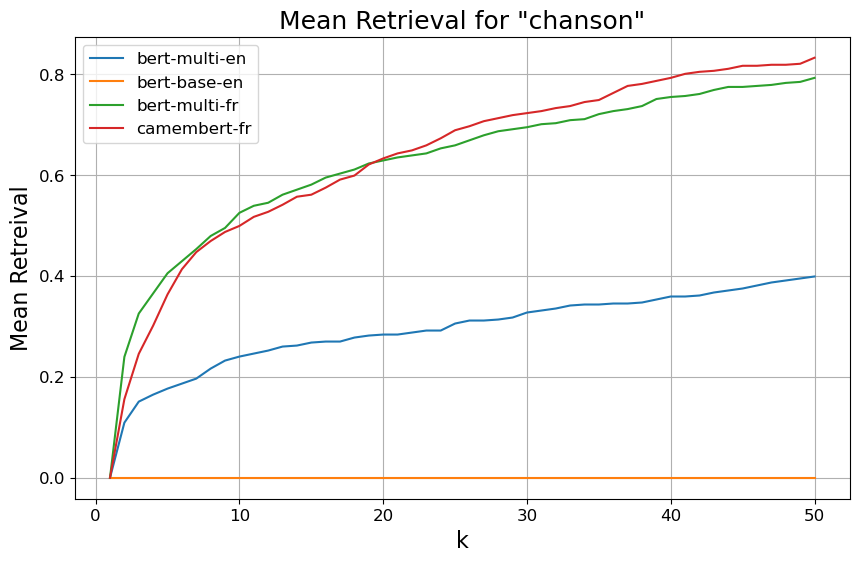

In [24]:
# plotting all results for chanson on one graph
import pandas as pd
import matplotlib.pyplot as plt
target = 'chanson'
row_df1 = bbmu_en_results_mer[bbmu_en_results_mer['word'] == target]
row_df2 = bbu_en_results_mer[bbu_en_results_mer['word'] == target]
row_df3 = bbmu_fr_results_mer[bbmu_fr_results_mer['word'] == target]
row_df4 = cam_fr_results_mer[cam_fr_results_mer['word'] == target]
y_values_df1 = row_df1.iloc[0, 3:].values.astype(float)
y_values_df2 = row_df2.iloc[0, 3:].values.astype(float)
y_values_df3 = row_df3.iloc[0, 3:].values.astype(float)
y_values_df4 = row_df4.iloc[0, 3:].values.astype(float)
# Plot the data using matplotlib
plt.figure(figsize=(10, 6))

k_values = list(range(1,51))
plt.plot(k_values, y_values_df1, label='bert-multi-en')
plt.plot(k_values, y_values_df2, label='bert-base-en')
plt.plot(k_values, y_values_df3, label='bert-multi-fr')
plt.plot(k_values, y_values_df4, label='camembert-fr')

plt.xlabel('k',fontsize=16)
plt.ylabel('Mean Retreival',fontsize=16)
plt.title(f'Mean Retrieval for "{target}"',fontsize=18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.grid(True)

plt.show()

## Plotting the results as a graph


## Removing unnecessary columns

In [25]:
#removing literal translation and en-fr loanword columns from english dataframes
bbmu_en_mean_se_mer.drop(bbmu_en_mean_se_mer[bbmu_en_mean_se_mer['word type']=='literal translation'].index | bbmu_en_mean_se_mer[bbmu_en_mean_se_mer['word type']=='en-fr loanword'].index,inplace=True )
bbmu_en_mean_se_mer.reset_index(inplace=True)
bbu_en_mean_se_mer.drop(bbu_en_mean_se_mer[bbu_en_mean_se_mer['word type']=='literal translation'].index | bbu_en_mean_se_mer[bbu_en_mean_se_mer['word type']=='en-fr loanword'].index,inplace=True )
bbu_en_mean_se_mer.reset_index(inplace=True)
bbmu_en_mean_se_mrr.drop(bbmu_en_mean_se_mrr[bbmu_en_mean_se_mrr['word type']=='literal translation'].index | bbmu_en_mean_se_mrr[bbmu_en_mean_se_mrr['word type']=='en-fr loanword'].index,inplace=True )
bbmu_en_mean_se_mrr.reset_index(inplace=True)
bbu_en_mean_se_mrr.drop(bbu_en_mean_se_mrr[bbu_en_mean_se_mrr['word type']=='literal translation'].index | bbu_en_mean_se_mrr[bbu_en_mean_se_mrr['word type']=='en-fr loanword'].index,inplace=True )
bbu_en_mean_se_mrr.reset_index(inplace=True)

/var/folders/f7/dcrb96gs3q7917hmz1pbdqf80000gn/T/ipykernel_33056/1921488857.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  bbmu_en_mean_se_mer.drop(bbmu_en_mean_se_mer[bbmu_en_mean_se_mer['word type']=='literal translation'].index | bbmu_en_mean_se_mer[bbmu_en_mean_se_mer['word type']=='en-fr loanword'].index,inplace=True )
/var/folders/f7/dcrb96gs3q7917hmz1pbdqf80000gn/T/ipykernel_33056/1921488857.py:4: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  bbu_en_mean_se_mer.drop(bbu_en_mean_se_mer[bbu_en_mean_se_mer['word type']=='literal translation'].index | bbu_en_mean_se_mer[bbu_en_mean_se_mer['word type']=='en-fr loanword'].index,inplace=True )
/var/folders/f7/dcrb96gs3q7917hmz1pbdqf80000gn/T/ipykernel_33056/1921488857.py:

In [26]:
#removing cr loanword and fr-en loanwords from french dataframes
bbmu_fr_mean_se_mer.drop(bbmu_fr_mean_se_mer[bbmu_fr_mean_se_mer['word type']=='cr loanword'].index | bbmu_fr_mean_se_mer[bbmu_fr_mean_se_mer['word type']=='fr-en loanword'].index,inplace=True )
bbmu_fr_mean_se_mer.reset_index(inplace=True)
cam_fr_mean_se_mer.drop(cam_fr_mean_se_mer[cam_fr_mean_se_mer['word type']=='cr loanword'].index | cam_fr_mean_se_mer[cam_fr_mean_se_mer['word type']=='fr-en loanword'].index,inplace=True )
cam_fr_mean_se_mer.reset_index(inplace=True)
bbmu_fr_mean_se_mrr.drop(bbmu_fr_mean_se_mrr[bbmu_fr_mean_se_mrr['word type']=='cr loanword'].index | bbmu_fr_mean_se_mrr[bbmu_fr_mean_se_mrr['word type']=='fr-en loanword'].index,inplace=True )
bbmu_fr_mean_se_mrr.reset_index(inplace=True)
cam_fr_mean_se_mrr.drop(cam_fr_mean_se_mrr[cam_fr_mean_se_mrr['word type']=='cr loanword'].index | cam_fr_mean_se_mrr[cam_fr_mean_se_mrr['word type']=='fr-en loanword'].index,inplace=True )
cam_fr_mean_se_mrr.reset_index(inplace=True)

/var/folders/f7/dcrb96gs3q7917hmz1pbdqf80000gn/T/ipykernel_33056/3992002457.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  bbmu_fr_mean_se_mer.drop(bbmu_fr_mean_se_mer[bbmu_fr_mean_se_mer['word type']=='cr loanword'].index | bbmu_fr_mean_se_mer[bbmu_fr_mean_se_mer['word type']=='fr-en loanword'].index,inplace=True )
/var/folders/f7/dcrb96gs3q7917hmz1pbdqf80000gn/T/ipykernel_33056/3992002457.py:4: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  cam_fr_mean_se_mer.drop(cam_fr_mean_se_mer[cam_fr_mean_se_mer['word type']=='cr loanword'].index | cam_fr_mean_se_mer[cam_fr_mean_se_mer['word type']=='fr-en loanword'].index,inplace=True )
/var/folders/f7/dcrb96gs3q7917hmz1pbdqf80000gn/T/ipykernel_33056/3992002457.py:6: FutureWarning

## MRR Scores

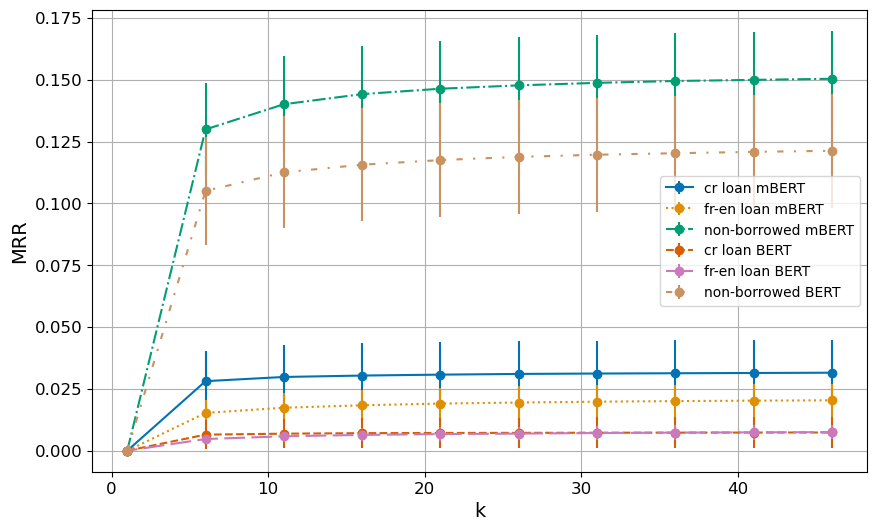

In [27]:
# english models MRR
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('colorblind')
plt.figure(figsize=(10, 6))

# plotting english ones on same graph
k_values = range(1,51,5) #reducing the number of values plotted to make it more legible
labels = {'cr loanword-bert-base-uncased':'cr loan BERT','cr loanword-bert-base-multilingual-uncased':'cr loan mBERT','fr-en loanword-bert-base-multilingual-uncased':'fr-en loan mBERT','fr-en loanword-bert-base-uncased':'fr-en loan BERT','non borrowed word-bert-base-multilingual-uncased':'non-borrowed mBERT','non borrowed word-bert-base-uncased':'non-borrowed BERT'}

linestyles1 = ['solid','dotted','dashdot']

for idx, row in bbmu_en_mean_se_mrr.iterrows():
  values = row.loc[1:50:10].values
  std_err_values = row.loc['1_std_err':'50_std_err':10].values
  linestyle = linestyles1[idx]
 
  plt.errorbar(k_values, values, yerr=std_err_values, fmt='o', label=labels[row['word type'] + '-' + row['model']], linestyle=linestyle)


linestyles2 = ['dashed',(5, (10, 3)),(0, (3, 5,1,5))]
for idx, row in bbu_en_mean_se_mrr.iterrows():
  values = row.loc[1:50:10].values
  std_err_values = row.loc['1_std_err':'50_std_err':10].values
  linestyle = linestyles2[idx]

  plt.errorbar(k_values, values, yerr=std_err_values, fmt='o', label=labels[row['word type'] + '-' + row['model']], linestyle=linestyle)


plt.xlabel('k', fontsize=14)  
plt.ylabel('MRR', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.title('')
plt.legend()
plt.grid(True)
plt.show()

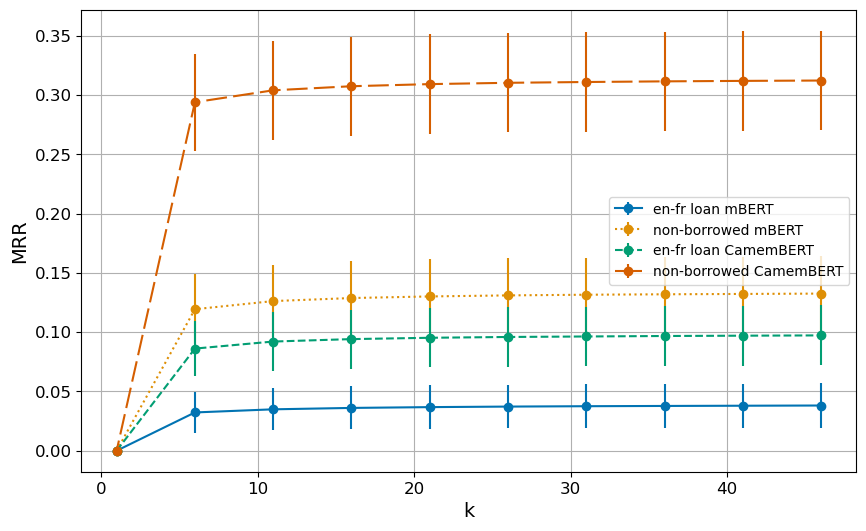

In [28]:
# french models MRR
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('colorblind')
plt.figure(figsize=(10, 6))

# plotting english ones on same graph
k_values = range(1,51,5) #reducing the number of values plotted to make it more legible
labelsfr = {'non borrowed word fr-camembert':'non-borrowed CamemBERT','non borrowed word fr-bert-base-multilingual-uncased':'non-borrowed mBERT','en-fr loanword-bert-base-multilingual-uncased':'en-fr loan mBERT','en-fr loanword-camembert':'en-fr loan CamemBERT'}

linestyles1 = ['solid','dotted','dashdot']
for idx, row in bbmu_fr_mean_se_mrr.iterrows():
    values = row.loc[1:50:10].values
    std_err_values = row.loc['1_std_err':'50_std_err':10].values
    linestyle = linestyles1[idx]

    # Plot the data with error bars using errorbar
    plt.errorbar(k_values, values, yerr=std_err_values, fmt='o', label=labelsfr[row['word type'] + '-' + row['model']], linestyle=linestyle)


linestyles2 = ['dashed',(5, (10, 3)),(0, (3, 5,1,5))]
for idx, row in cam_fr_mean_se_mrr.iterrows():
  values = row.loc[1:50:10].values
  std_err_values = row.loc['1_std_err':'50_std_err':10].values
  linestyle = linestyles2[idx]

  plt.errorbar(k_values, values, yerr=std_err_values, fmt='o', label=labelsfr[row['word type'] + '-' + row['model']], linestyle=linestyle)


plt.xlabel('k', fontsize=14)  
plt.ylabel('MRR', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.legend()
plt.grid(True)
plt.show()

## Mean Retrieval

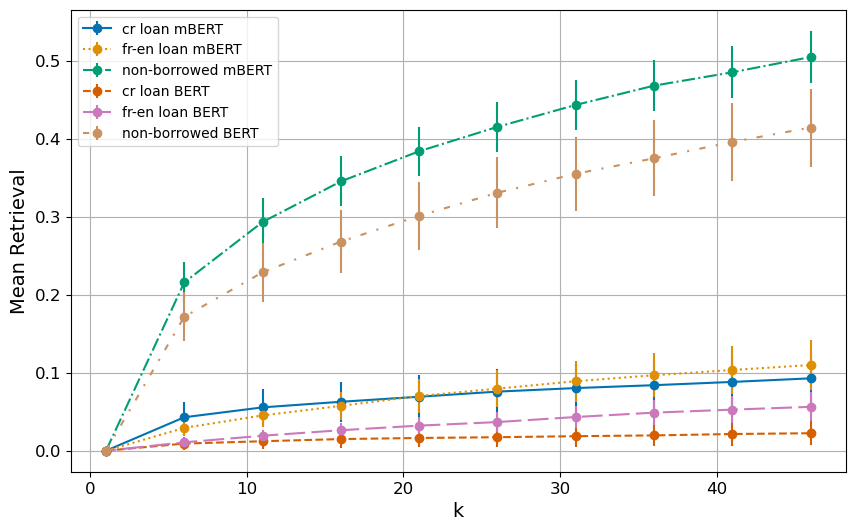

In [29]:
# english models mean retrieval
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('colorblind')
plt.figure(figsize=(10, 6))

# plotting english ones on same graph
k_values = range(1,51,5) #reducing the number of values plotted to make it more legible
labels = {'cr loanword-bert-base-uncased':'cr loan BERT','cr loanword-bert-base-multilingual-uncased':'cr loan mBERT','fr-en loanword-bert-base-multilingual-uncased':'fr-en loan mBERT','fr-en loanword-bert-base-uncased':'fr-en loan BERT','non borrowed word-bert-base-multilingual-uncased':'non-borrowed mBERT','non borrowed word-bert-base-uncased':'non-borrowed BERT'}

linestyles1 = ['solid','dotted','dashdot']

for idx, row in bbmu_en_mean_se_mer.iterrows():
  values = row.loc[1:50:10].values
  std_err_values = row.loc['1_std_err':'50_std_err':10].values
  linestyle = linestyles1[idx]
 
  plt.errorbar(k_values, values, yerr=std_err_values, fmt='o', label=labels[row['word type'] + '-' + row['model']], linestyle=linestyle)


linestyles2 = ['dashed',(5, (10, 3)),(0, (3, 5,1,5))]
for idx, row in bbu_en_mean_se_mer.iterrows():
  values = row.loc[1:50:10].values
  std_err_values = row.loc['1_std_err':'50_std_err':10].values
  linestyle = linestyles2[idx]

  plt.errorbar(k_values, values, yerr=std_err_values, fmt='o', label=labels[row['word type'] + '-' + row['model']], linestyle=linestyle)


plt.xlabel('k', fontsize=14)  
plt.ylabel('Mean Retrieval', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.title('')
plt.legend()
plt.grid(True)
plt.show()

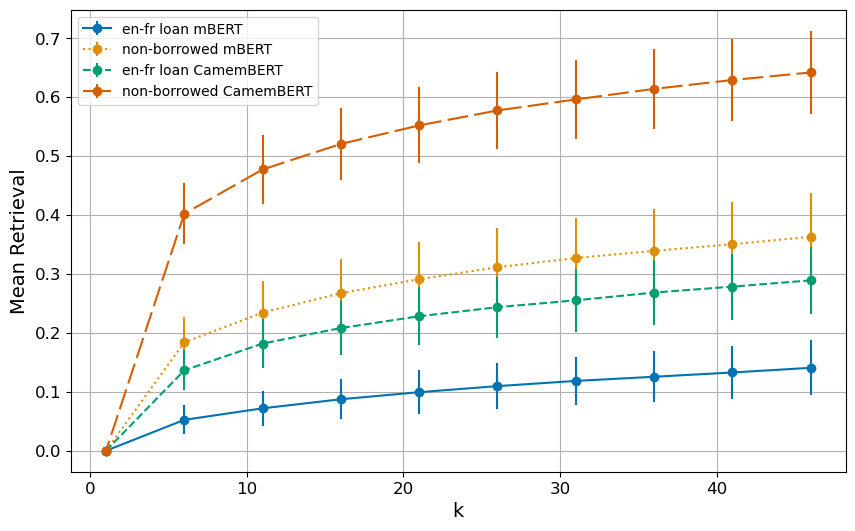

In [30]:
# french models mean retrieval
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('colorblind')
plt.figure(figsize=(10, 6))

# plotting english ones on same graph
k_values = range(1,51,5) #reducing the number of values plotted to make it more legible
labelsfr = {'non borrowed word fr-camembert':'non-borrowed CamemBERT','non borrowed word fr-bert-base-multilingual-uncased':'non-borrowed mBERT','en-fr loanword-bert-base-multilingual-uncased':'en-fr loan mBERT','en-fr loanword-camembert':'en-fr loan CamemBERT'}

linestyles1 = ['solid','dotted','dashdot']
for idx, row in bbmu_fr_mean_se_mer.iterrows():
    values = row.loc[1:50:10].values
    std_err_values = row.loc['1_std_err':'50_std_err':10].values
    linestyle = linestyles1[idx]

    # Plot the data with error bars using errorbar
    plt.errorbar(k_values, values, yerr=std_err_values, fmt='o', label=labelsfr[row['word type'] + '-' + row['model']], linestyle=linestyle)


linestyles2 = ['dashed',(5, (10, 3)),(0, (3, 5,1,5))]
for idx, row in cam_fr_mean_se_mer.iterrows():
  values = row.loc[1:50:10].values
  std_err_values = row.loc['1_std_err':'50_std_err':10].values
  linestyle = linestyles2[idx]

  plt.errorbar(k_values, values, yerr=std_err_values, fmt='o', label=labelsfr[row['word type'] + '-' + row['model']], linestyle=linestyle)


plt.xlabel('k', fontsize=14)  
plt.ylabel('Mean Retrieval', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.legend()
plt.grid(True)
plt.show()

## Mean retrieval per word type by number of tokens 

In [31]:
#uncomment below line if using google colab
# !pip install transformers 

from transformers import BertTokenizer, BertForMaskedLM

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

2023-08-24 21:49:59.160084: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
import numpy as np

def get_mean_per_tokens(df,tokenizer,k_values):

  token_counts = []
  words = df['word'].tolist()
  for word in words:
    token_counts += [len(tokenizer.tokenize(word))]
  df['token_counts'] = token_counts

  for col in k_values:
    df[col] = df[col].astype('float')

  count_data = df.groupby(['word type', 'token_counts']).size().reset_index(name='token_sum')

  # Drop the columns that are not needed for averaging
  columns_to_drop = ['word', 'model']
  df_avg = df.drop(columns=columns_to_drop)

  # Group by 'word type' and 'token_counts', and calculate averages
  grouped_data = df_avg.groupby(['word type', 'token_counts']).agg({col: 'mean' for col in k_values}).reset_index()

  # Merge the count information based on 'word type' and 'token_counts'
  final_df = grouped_data.merge(count_data, on=['word type', 'token_counts'], how='left')

  return final_df

In [34]:
camembert_tokens_mean = get_mean_per_tokens(cam_fr_results_mer,tokenizer, k_values)
bbu_tokens_mean = get_mean_per_tokens(bbu_en_results_mer,tokenizer, k_values)
bbmu_fr_tokens_mean = get_mean_per_tokens(bbmu_fr_results_mer,tokenizer, k_values)
bbmu_en_tokens_mean = get_mean_per_tokens(bbmu_en_results_mer,tokenizer, k_values)

In [38]:
bbu_tokens_mean['token_counts'].unique()

array([1, 2, 3, 4, 5])